In [31]:
import qiskit
print(qiskit.__version__)

2.1.2


In [32]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

In [52]:
service = QiskitRuntimeService(name="XYZ")
service.saved_accounts()

AccountNotFoundError: 'Account with the name XYZ does not exist on disk.'

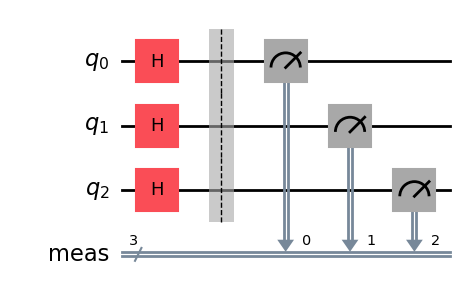

In [34]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)

qc.measure_all

qc.draw("mpl")

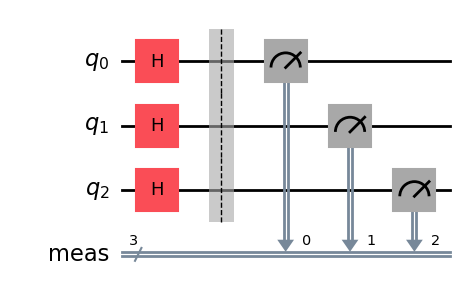

In [35]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level = 1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

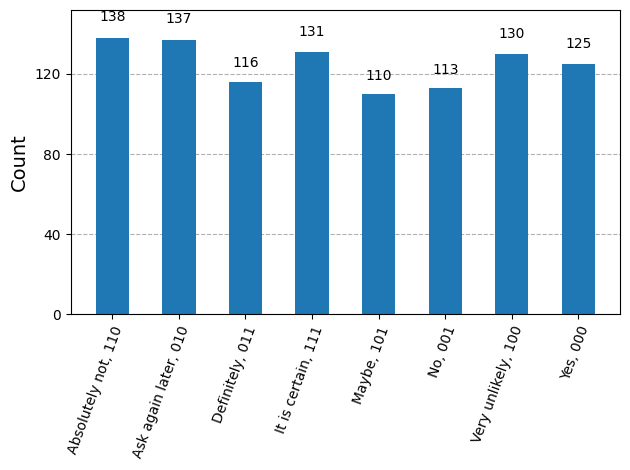

In [49]:
sampler = Sampler(backend)
job = sampler.run([qc], shots=1000)
result = job.result()
counts = result[0].data.meas.get_counts()

answers = {
    "000": "Yes, 000",
    "001": "No, 001",
    "010": "Ask again later, 010",
    "011": "Definitely, 011",
    "100": "Very unlikely, 100",
    "101": "Maybe, 101",
    "110": "Absolutely not, 110",
    "111": "It is certain, 111"
}
labeled_counts = {answers.get(bit, bit): count for bit, count in counts.items()}

plot_histogram(labeled_counts)